In [1]:
# Objectives: 
#        1) Use citipy to extract city names from lon and lat values
#        2) For each of the cities extract weather conditions using api
#        3) Plot scatter plots for lat values vs weather data
#        4) Perform regression analysis for lat values vs weather data   

In [2]:
# Import libraries and api keys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

# API key for openweathermaps
from api_keys import weather_api_key

In [3]:
# Generate a list of cities by randomly arranging longitude and latitudes

# Empty lists
lat_lngs = []
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Pull 1500 random samples of lat and lng
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Translate lat and lngs to cities
for i in lat_lngs:
    city = citipy.nearest_city(i[0], i[1]).city_name
    
    # Keep only if city name is unique
    if city not in cities:
        cities.append(city)

# Print count and city names
print(len(cities))
print(cities)

621
['port-aux-francais', 'enewetak', 'iqaluit', 'thompson', 'port mathurin', 'edinburgh of the seven seas', 'rio preto da eva', 'inari', 'taiohae', 'puerto baquerizo moreno', 'grytviken', 'talnakh', 'jamestown', 'mtama', 'adamstown', 'west island', 'ushuaia', 'waitangi', 'katsuura', 'san julian', 'geraldton', 'rustington', 'daru', 'umm kaddadah', 'uturoa', 'colonia', 'carutapera', 'ocean pointe', 'albany', 'tiksi', 'tandag', 'margaret river', 'mount gambier', 'badger', 'nkove', 'shamva', 'bethel', 'ulan-ude', 'hasaki', 'petropavlovsk-kamchatsky', 'gewane', 'kuanda', 'blackmans bay', 'bilibino', 'nahiyat ash shinafiyah', 'thinadhoo', 'leon', 'anadyr', 'lorengau', 'vanimo', 'port lincoln', 'mana', 'lata', 'mar del plata', 'port elizabeth', 'coyhaique', 'touros', 'glace bay', 'hawaiian paradise park', 'mizdah', 'isafjordur', 'tazovsky', 'east london', 'bredasdorp', 'remire-montjoly', 'mermoz boabab', 'mata-utu', 'ingeniero guillermo n. juarez', 'puerto ayora', 'guroymak', 'san patricio',

In [6]:
# Compile weather data using OpenWeatherMap api

# Base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Initialize list
city_data = []

# Create counters
record_count = 1
set_count = 1

# Loop through all cities
for city in cities:

    # Build url to send request
    city_url = url + "&q=" + city

    # For each of the cities
    try:
        # Send request
        city_weather = requests.get(city_url).json()

        # Receive data from api
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append data to list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # Error handling
    except:
        print("City not found. Skip..")
              
print("Done!")

City not found. Skip..
City not found. Skip..
City not found. Skip..
City not found. Skip..
City not found. Skip..
City not found. Skip..
City not found. Skip..
City not found. Skip..
City not found. Skip..
City not found. Skip..
City not found. Skip..
City not found. Skip..
City not found. Skip..
City not found. Skip..
City not found. Skip..
City not found. Skip..
City not found. Skip..
City not found. Skip..
City not found. Skip..
City not found. Skip..
City not found. Skip..
City not found. Skip..
City not found. Skip..
City not found. Skip..
City not found. Skip..
City not found. Skip..
City not found. Skip..
Done!


In [5]:
# Convert to dataframe
city_data_df = pd.DataFrame(city_data)

print(city_data_df.count())

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64


In [7]:
# Top five
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,2.94,94,99,17.77,TF,1698705793
1,enewetak,11.3474,162.3373,28.71,79,93,10.18,MH,1698705843
2,iqaluit,63.7506,-68.5145,-12.15,78,75,11.83,CA,1698705814
3,thompson,55.7435,-97.8558,-5.91,68,100,4.63,CA,1698705806
4,port mathurin,-19.6833,63.4167,24.71,81,1,7.70,MU,1698705801


In [8]:
# Export to csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [9]:
# Read back data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display head
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.94,94,99,17.77,TF,1698705793
1,enewetak,11.3474,162.3373,28.71,79,93,10.18,MH,1698705843
2,iqaluit,63.7506,-68.5145,-12.15,78,75,11.83,CA,1698705814
3,thompson,55.7435,-97.8558,-5.91,68,100,4.63,CA,1698705806
4,port mathurin,-19.6833,63.4167,24.71,81,1,7.70,MU,1698705801


/var/folders/2m/j6ql78x14931wns3gsw7blrr0000gn/T/ipykernel_7998/3560225135.py:3: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


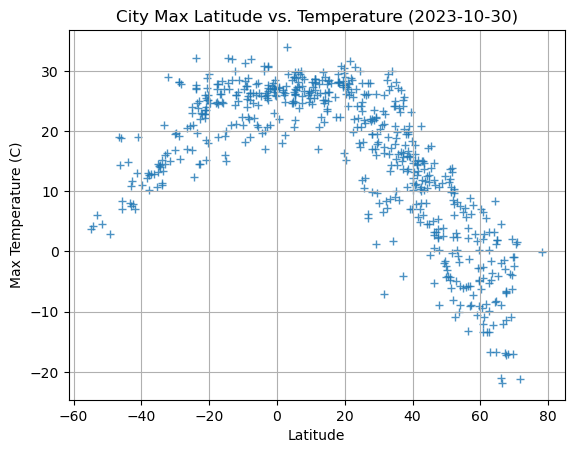

In [10]:
# Associate Latitude and temperature

plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="+", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save 
plt.savefig("Temp_vs_Lat.png")

# Show plot
plt.show()

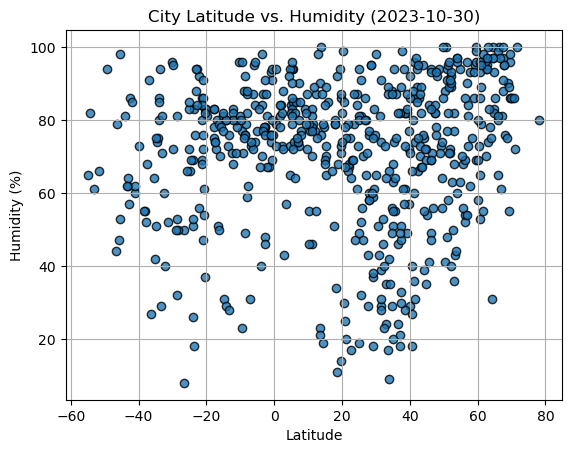

In [11]:
# Associate Latitude and humidity

plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save
plt.savefig("Humidity_vs_Lat.png")

# Show plot
plt.show()

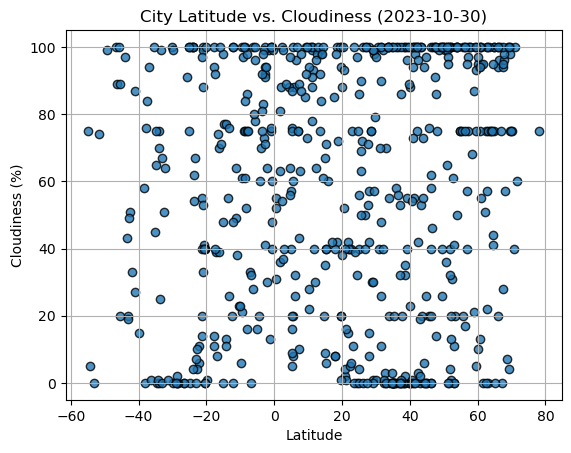

In [12]:
# Associate Latitude and cloudiness

plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save 
plt.savefig("Cloudiness_vs_Lat.png")

# Show plot
plt.show()

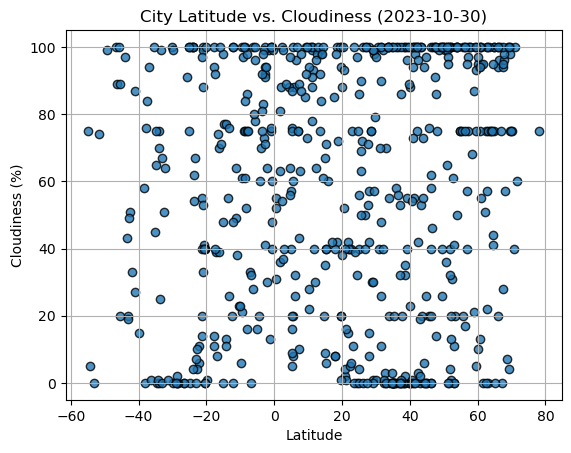

In [13]:
# Associate Latitude and cloudiness

plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save 
plt.savefig("Cloudiness_vs_Lat.png")

# Show plot
plt.show()

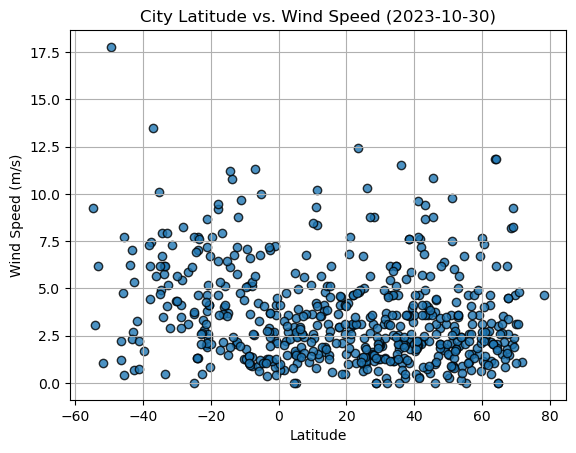

In [14]:
# Associate Latitude and wind speed

plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    edgecolor="black", 
    linewidths=1, 
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save
plt.savefig("Windspeed_vs_Lat.png")

# Show plot
plt.show()

In [26]:
# Regression analysis for each of the pairs above.

# Define a function
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"r-squared value is: {rvalue**2}")
    print(f"r value is: {rvalue}")
    plt.show()

In [16]:
# Create Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0),:]

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,enewetak,11.3474,162.3373,28.71,79,93,10.18,MH,1698705843
2,iqaluit,63.7506,-68.5145,-12.15,78,75,11.83,CA,1698705814
3,thompson,55.7435,-97.8558,-5.91,68,100,4.63,CA,1698705806
7,inari,68.9060,27.0288,-10.89,90,100,2.08,FI,1698706194
10,talnakh,69.4865,88.3972,-17.11,96,100,2.35,RU,1698705840


In [17]:
# Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0),:]

southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.94,94,99,17.77,TF,1698705793
4,port mathurin,-19.6833,63.4167,24.71,81,1,7.70,MU,1698705801
5,edinburgh of the seven seas,-37.0676,-12.3116,12.84,91,94,13.49,SH,1698705794
6,rio preto da eva,-2.6994,-59.6997,30.88,48,94,2.92,BR,1698706193
8,puerto baquerizo moreno,-0.9000,-89.6000,26.55,74,75,4.12,EC,1698705898


The r-squared value is: 0.7410195614824996
The r value is: -0.8608249307974878


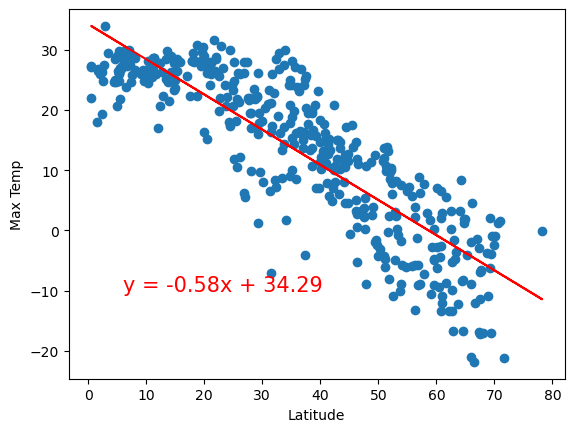

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10))

The r-squared value is: 0.5817014923020135
The r value is: 0.7626935769376936


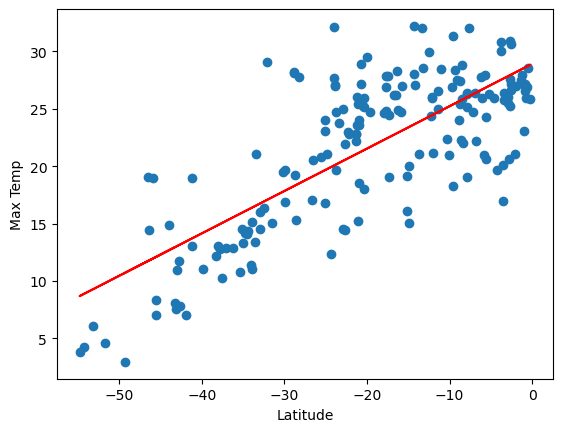

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

The r-squared value is: 0.02190728293206495
The r value is: 0.14801109057116277


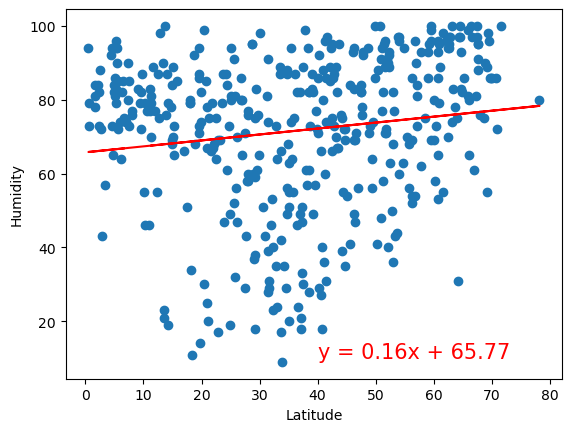

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))

The r-squared value is: 0.03955279052227897
The r value is: 0.19887883377141713


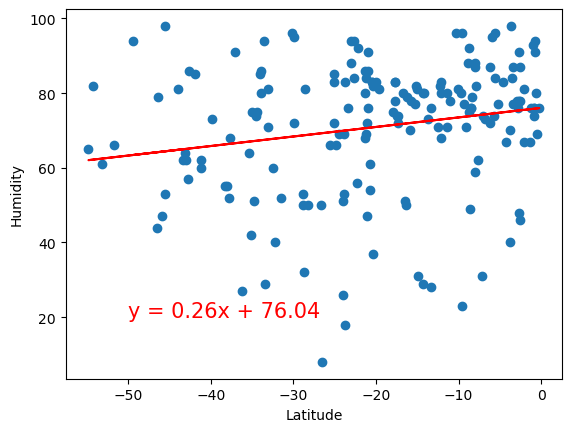

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

The r-squared value is: 0.00568377108542542
The r value is: 0.07539078912854952


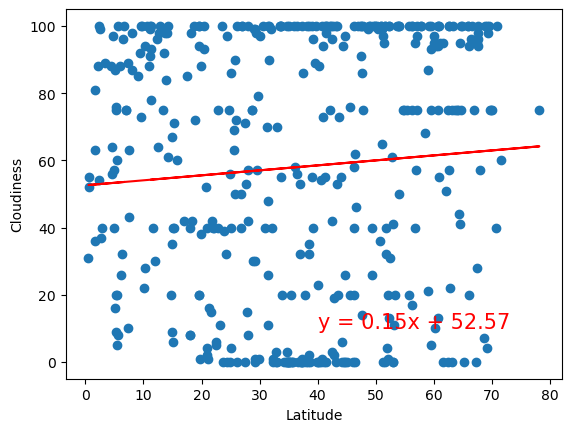

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

The r-squared value is: 0.03618534645520438
The r value is: 0.1902244633458178


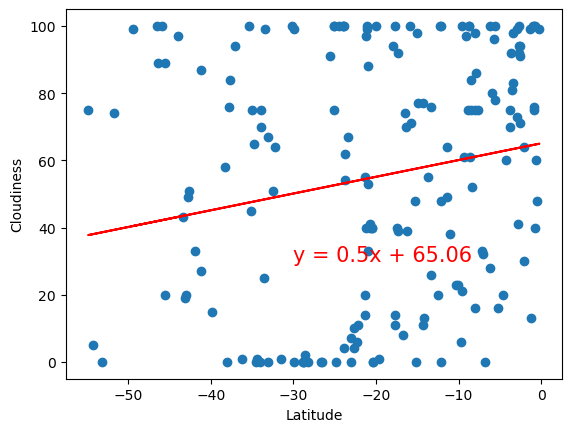

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

The r-squared value is: 0.00020867269092025262
The r value is: 0.014445507638025485


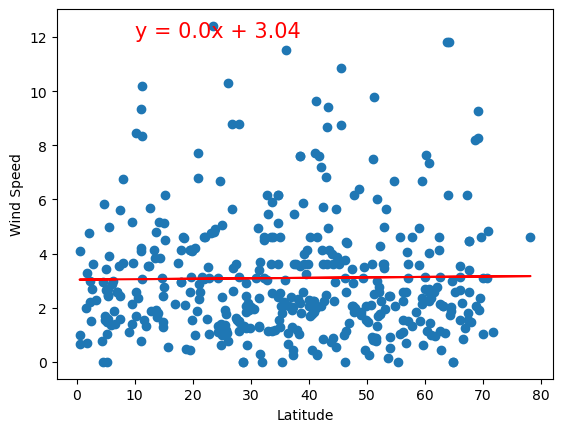

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))

The r-squared value is: 0.05607708937752152
The r value is: -0.23680601634570334


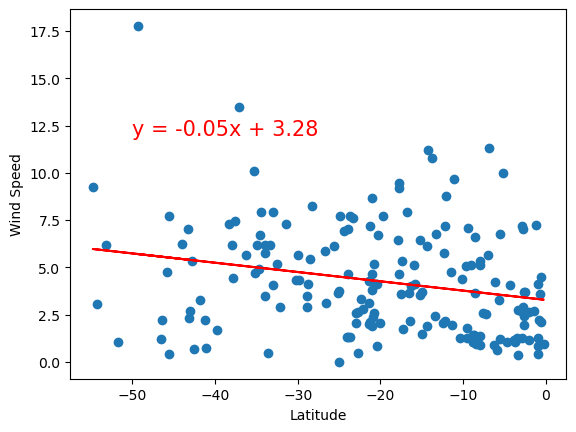

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))